# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Indradi Rahmatullah
- **Email:** indradirhm@gmail.com
- **ID Dicoding:** indradi

## Menentukan Pertanyaan Bisnis



1.   Bagaimana distribusi jumlah pesanan yang berhasil dikirim tepat waktu dibandingkan dengan yang terlambat?
2.   Apa jenis metode pembayaran yang paling sering digunakan untuk menyelesaikan pesanan?
3.   Di kota mana terdapat jumlah penjual yang paling banyak?
4.   Apakah ada hubungan antara nilai pembayaran (payment_value) dan rating ulasan (review_score) dari pelanggan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib
import matplotlib.image as mpimg
from scipy import stats
import seaborn as sns

## Data Wrangling

### Gathering Data

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Path to the directory containing the CSV files
data_path = "/content/drive/MyDrive/E-Commerce Public Dataset/"

# Load datasets (customers and sellers are optional for this analysis)
df_orders = pd.read_csv(data_path + 'orders_dataset.csv')
df_items = pd.read_csv(data_path + 'order_items_dataset.csv')
df_products = pd.read_csv(data_path + 'products_dataset.csv')
df_payments = pd.read_csv(data_path + 'order_payments_dataset.csv')
df_reviews = pd.read_csv(data_path + 'order_reviews_dataset.csv')
df_customers = pd.read_csv(data_path + 'customers_dataset.csv')
df_sellers = pd.read_csv(data_path + 'sellers_dataset.csv')
df_geolocation = pd.read_csv(data_path + 'geolocation_dataset.csv')
df_category_translation = pd.read_csv(data_path + 'product_category_name_translation.csv')

# Store the dataframes in a dictionary for easier access
dataframes = {
    'orders': df_orders,
    'items': df_items,
    'products': df_products,
    'payments': df_payments,
    'reviews': df_reviews,
    'customers': df_customers,
    'sellers': df_sellers,
    'geolocation': df_geolocation,
    'categories': df_category_translation
}

In [7]:
# Display a few rows of data from each dataset
for name, dataframe in dataframes.items():
    print(f"\n{name.upper()} Dataset:")
    print(dataframe.head())


ORDERS Dataset:
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00 

### Assessing Data

In [8]:
# Check datatype each data
for df_name, df in dataframes.items():
  print('\n', dataframes[df_name].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  

In [9]:
# Convert datetime columns in the 'orders' data
order_datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date",
                          "order_delivered_customer_date", "order_estimated_delivery_date"]

for col in order_datetime_columns:
    dataframes['orders'][col] = pd.to_datetime(dataframes['orders'][col])

# Print the first few rows to check the conversion results in 'orders'
print("Sample data from 'orders' after datetime conversion:")
print(dataframes['orders'][order_datetime_columns].head())

# Convert datetime columns in the 'items' data
item_datetime_columns = ["shipping_limit_date"]

for col in item_datetime_columns:
    dataframes['items'][col] = pd.to_datetime(dataframes['items'][col])

# Print the first few rows to check the conversion results in 'items'
print("\nSample data from 'items' after datetime conversion:")
print(dataframes['items'][item_datetime_columns].head())

# Convert datetime columns in the 'reviews' data
review_datetime_columns = ["review_creation_date", "review_answer_timestamp"]

for col in review_datetime_columns:
    dataframes['reviews'][col] = pd.to_datetime(dataframes['reviews'][col])

# Print the first few rows to check the conversion results in 'reviews'
print("\nSample data from 'reviews' after datetime conversion:")
print(dataframes['reviews'][review_datetime_columns].head())


Sample data from 'orders' after datetime conversion:
  order_purchase_timestamp   order_approved_at order_delivered_carrier_date  \
0      2017-10-02 10:56:33 2017-10-02 11:07:15          2017-10-04 19:55:00   
1      2018-07-24 20:41:37 2018-07-26 03:24:27          2018-07-26 14:31:00   
2      2018-08-08 08:38:49 2018-08-08 08:55:23          2018-08-08 13:50:00   
3      2017-11-18 19:28:06 2017-11-18 19:45:59          2017-11-22 13:39:59   
4      2018-02-13 21:18:39 2018-02-13 22:20:29          2018-02-14 19:46:34   

  order_delivered_customer_date order_estimated_delivery_date  
0           2017-10-10 21:25:13                    2017-10-18  
1           2018-08-07 15:27:45                    2018-08-13  
2           2018-08-17 18:06:29                    2018-09-04  
3           2017-12-02 00:28:42                    2017-12-15  
4           2018-02-16 18:17:02                    2018-02-26  

Sample data from 'items' after datetime conversion:
  shipping_limit_date
0 2017-09-19 

In [10]:
# Initialize dictionaries to store counts for duplicates, total samples
duplicates = {}
sample_totals = {}
null_values = {}

# Loop through each DataFrame in 'dataframes' to calculate duplicate and total sample counts
for name, df in dataframes.items():
    duplicates[name] = df.duplicated().sum()  # Count duplicates
    sample_totals[name] = len(df)  # Count total samples

# Create DataFrames from the dictionaries for duplicate and total sample counts
duplicates_df = pd.DataFrame.from_dict(duplicates, orient='index', columns=['Duplicate Count'])
sample_totals_df = pd.DataFrame.from_dict(sample_totals, orient='index', columns=['Total Sample Count'])

# Combine both DataFrames horizontally
combined_counts_df = pd.concat([sample_totals_df, duplicates_df], axis=1)

# Print the combined DataFrame for quick reference
print(combined_counts_df)

             Total Sample Count  Duplicate Count
orders                    99441                0
items                    112650                0
products                  32951                0
payments                 103886                0
reviews                   99224                0
customers                 99441                0
sellers                    3095                0
geolocation             1000163           261831
categories                   71                0


In [11]:
# Initialize dictionary to store null value counts
null_values = {}

# Loop through each DataFrame in 'dataframes' to calculate and store null value counts
for name, df in dataframes.items():
    null_values[name] = df.isna().sum()

# Convert the dictionary to a DataFrame for a cleaner display
null_values_df = pd.DataFrame.from_dict(null_values, orient='index')

# Print the DataFrame with null value counts for each DataFrame
print("Null Values Count for Each DataFrame:")
print(null_values_df)

Null Values Count for Each DataFrame:
             order_id  customer_id  order_status  order_purchase_timestamp  \
orders            0.0          0.0           0.0                       0.0   
items             0.0          NaN           NaN                       NaN   
payments          0.0          NaN           NaN                       NaN   
reviews           0.0          NaN           NaN                       NaN   
customers         NaN          0.0           NaN                       NaN   
products          NaN          NaN           NaN                       NaN   
sellers           NaN          NaN           NaN                       NaN   
categories        NaN          NaN           NaN                       NaN   
geolocation       NaN          NaN           NaN                       NaN   

             order_approved_at  order_delivered_carrier_date  \
orders                   160.0                        1783.0   
items                      NaN                       

### Cleaning Data

#### Orders Data

In [12]:
# Clean data for 'orders' dataset
# Print the value counts of 'order_status' and percentage of 'delivered' orders
delivered_orders_count = dataframes['orders']['order_status'].value_counts()
print(delivered_orders_count)
delivered_percentage = round((delivered_orders_count['delivered'] / len(dataframes['orders'])) * 100, 2)
print(f'Taking only delivered orders, we still get {delivered_percentage}% of the data.')

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64
Taking only delivered orders, we still get 97.02% of the data.


In [13]:
# Identify the orders that are not delivered
non_delivered_orders = dataframes['orders']['order_id'][dataframes['orders']['order_status'] != 'delivered'].values

# Drop non-delivered orders from other dataframes
for df_name, df in dataframes.items():
    if 'order_id' in df.columns:
        df.drop(df[df['order_id'].isin(non_delivered_orders)].index, inplace=True)

In [14]:
# Print the percentage of missing values in each column
for df_name, df in dataframes.items():
    for column in df.columns:
        missing_percentage = (df[column].isnull().sum() / len(df)) * 100
        if missing_percentage > 0:
            print(f'{column} (%): {missing_percentage:.2f}')

order_approved_at (%): 0.01
order_delivered_carrier_date (%): 0.00
order_delivered_customer_date (%): 0.01
product_category_name (%): 1.85
product_name_lenght (%): 1.85
product_description_lenght (%): 1.85
product_photos_qty (%): 1.85
product_weight_g (%): 0.01
product_length_cm (%): 0.01
product_height_cm (%): 0.01
product_width_cm (%): 0.01
review_comment_title (%): 88.37
review_comment_message (%): 59.42


In [15]:
# Handle missing delivery dates in the 'orders' dataset
missing_delivery_dates_count = dataframes['orders']['order_delivered_customer_date'].isnull().sum()
print(f'There are {missing_delivery_dates_count} orders missing delivery dates.')

# Identify orders with missing delivery dates and remove them from other datasets
missing_delivery_orders = dataframes['orders']['order_id'][dataframes['orders']['order_delivered_customer_date'].isnull()].values
for df_name, df in dataframes.items():
    if 'order_id' in df.columns:
        df.drop(df[df['order_id'].isin(missing_delivery_orders)].index, inplace=True)

# Add a new column to indicate whether orders were delivered on time
dataframes['orders']['delivered_on_time'] = np.where(dataframes['orders']['order_delivered_customer_date'] < dataframes['orders']['order_estimated_delivery_date'], 'On Time', 'Late')

There are 8 orders missing delivery dates.


#### Reviews Data

In [16]:
# Clean 'reviews' dataset by dropping unnecessary columns
reviews_columns_to_drop = ['review_comment_title']
dataframes['reviews'].drop(reviews_columns_to_drop, axis=1, inplace=True)

# Replace null values in 'review_comment_message' with binary values (0 for null, 1 for non-null)
dataframes['reviews']['review_comment_message'] = np.where(dataframes['reviews']['review_comment_message'].isnull(), 0, 1)

#### Geo Data

In [17]:
# Remove duplicates in the 'geo' dataset
dataframes['geolocation'].drop_duplicates(inplace=True)

#### Products Data

In [18]:
# Clean 'products' dataset by dropping columns that are not necessary
products_columns_to_drop = ['product_name_lenght', 'product_description_lenght', 'product_weight_g',
                            'product_length_cm', 'product_height_cm', 'product_width_cm']
dataframes['products'].drop(products_columns_to_drop, axis=1, inplace=True)

# Fill missing values in 'product_category_name' and 'product_photos_qty'
dataframes['products']['product_category_name'].fillna('outro', inplace=True)
dataframes['products']['product_photos_qty'].fillna(0, inplace=True)

<ipython-input-18-42688dbb98ab>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframes['products']['product_category_name'].fillna('outro', inplace=True)
<ipython-input-18-42688dbb98ab>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

## Exploratory Data Analysis (EDA)

### Explore Customers

In [19]:
# Display the first 4 rows of the 'customers' DataFrame
first_4_customers = dataframes['customers'].head(4)
print(first_4_customers)

# Count and sort the number of distinct customers by city
customers_by_city = dataframes['customers'].groupby('customer_city')['customer_id'].nunique().sort_values(ascending=False)
print(customers_by_city)

# Count and sort the number of distinct customers by state
customers_by_state = dataframes['customers'].groupby('customer_state')['customer_id'].nunique().sort_values(ascending=False)
print(customers_by_state)

                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_i

### Explore Payments

In [20]:
# Display a random sample of 4 rows from the 'payments' DataFrame
random_payment_sample = dataframes['payments'].sample(4)
print(random_payment_sample)

# Count and sort the number of distinct orders by payment type
orders_by_payment_type = dataframes['payments'].groupby('payment_type')['order_id'].nunique().sort_values(ascending=False)
print(orders_by_payment_type)

                               order_id  payment_sequential payment_type  \
79395  a9d6b730b2ad516caeb90d9fd52c7300                   1  credit_card   
65777  0ec9178c102513dbaf788344446a3305                   1       boleto   
28303  4b27760ac4ae035083d524268ca2ea4a                   1  credit_card   
29100  8c5fa1a922cfa46db8478221148d7bfd                   1  credit_card   

       payment_installments  payment_value  
79395                     2          66.69  
65777                     1         385.41  
28303                     2         190.44  
29100                     1          46.05  
payment_type
credit_card    74297
boleto         19191
voucher         3679
debit_card      1484
Name: order_id, dtype: int64


### Explore Orders

In [21]:
# Display a random sample of 5 rows from the 'orders' DataFrame
random_order_sample = dataframes['orders'].sample(4)
print(random_order_sample)

# Get descriptive statistics for the 'delivered_on_time' column in the 'orders' DataFrame
delivery_time_summary = dataframes['orders']['delivered_on_time'].describe()
print(delivery_time_summary)

                               order_id                       customer_id  \
99030  442c6fc8659cdf5bd32a9631cf51b3c2  a3f57ef05079a04651bd421fa6e4d919   
92093  023669233121f0fb7899e5be2b22885f  22c15b46adce8afdd7d58e6582752263   
56290  daed9e78d8caf060ecb46125d167dc67  c0d3af311caad01cc8343a88fe70fdf6   
81931  52f615efc72a6f22cdec7e16571e08cc  bf3acde8a49fdbb80ab6fa27649203ac   

      order_status order_purchase_timestamp   order_approved_at  \
99030    delivered      2018-05-06 15:10:37 2018-05-06 15:33:32   
92093    delivered      2018-04-16 13:14:09 2018-04-17 04:54:27   
56290    delivered      2018-05-21 15:47:51 2018-05-21 16:55:08   
81931    delivered      2017-06-19 00:32:58 2017-06-20 10:55:11   

      order_delivered_carrier_date order_delivered_customer_date  \
99030          2018-05-07 18:36:00           2018-05-16 22:46:34   
92093          2018-04-18 20:23:49           2018-04-19 16:37:46   
56290          2018-05-23 11:31:00           2018-05-25 17:46:21   
81931 

### Explore Cust and Orders

In [22]:
# Merge 'customers' and 'orders' DataFrames on 'customer_id' using a left join
merged_customers_orders = pd.merge(
    left=dataframes['customers'],
    right=dataframes['orders'],
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)

# Display the first few rows of the merged DataFrame
merged_customers_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,On Time
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,On Time
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,Late
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,On Time
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,On Time


In [23]:
# Merge 'payments' and 'reviews' DataFrames on 'order_id' using a left join
merged_payments_reviews = pd.merge(
    left=dataframes['payments'],
    right=dataframes['reviews'],
    how="left",
    left_on="order_id",
    right_on="order_id"
)

# Display the first few rows of the merged DataFrame
merged_payments_reviews.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,1.0,2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,0.0,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,1.0,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,0.0,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,0.0,2017-12-21,2017-12-22 01:10:39


In [24]:
# Sort the 'merged_payments_reviews' DataFrame by 'payment_value' in descending order
sorted_payments_reviews = merged_payments_reviews.sort_values(by="payment_value", ascending=False)
# Display the sorted DataFrame
sorted_payments_reviews.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
50839,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,211fa81a22870cc634265ea85b751e40,1.0,1.0,2017-10-18,2017-10-19 13:10:39
33495,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88,6b9a600f1bb824da4ca38f65baf42526,1.0,1.0,2018-07-27,2018-07-28 02:36:10
40402,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31,e2fbd9f0ef7b724c7ecb351601a857e7,5.0,1.0,2017-03-04,2017-03-04 21:40:41
48364,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21,NaN,NaN,NaN,NaT,NaT
83426,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66,1b73e6c7cd135008ebeb18404b776ddc,5.0,0.0,2017-06-06,2017-06-07 19:35:23


In [25]:
# Group the 'merged_payments_reviews' DataFrame by 'payment_type' and aggregate the results
payment_type_summary = merged_payments_reviews.groupby(by="payment_type").agg({
    "order_id": "nunique",  # Count unique order_ids
    "payment_value": ["min", "max"]  # Get the minimum and maximum payment_value
})

# Display the aggregated summary
payment_type_summary.head()

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19191         11.62   7274.88
credit_card     74297          0.01  13664.08
debit_card       1484         13.38   4445.50
voucher          3679          0.00   1839.05

In [26]:
# Merge 'customers_orders_df' and 'payments_reviews_df' DataFrames on 'order_id' using a left join
merged_customers_payments_reviews = pd.merge(
    left=merged_customers_orders,
    right=merged_payments_reviews,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

# Display the first few rows of the merged DataFrame
merged_customers_payments_reviews.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,delivered_on_time,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,On Time,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,0.0,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,On Time,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,0.0,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,Late,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,0.0,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,On Time,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,0.0,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,On Time,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,1.0,2018-08-10,2018-08-17 01:59:52


### Explore Item and Sellers

In [27]:
# Merge 'items' and 'sellers' DataFrames on 'seller_id' using a left join
merged_items_sellers = pd.merge(
    left=dataframes['items'],
    right=dataframes['sellers'],
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)

# Display the first few rows of the merged DataFrame
merged_items_sellers.head()

# Group by 'seller_city' and count the number of distinct seller_ids, sorted in descending order
top_seller_cities = merged_items_sellers.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(10)

# Display the top 10 cities with the most distinct sellers
print(top_seller_cities)

seller_city
sao paulo         661
curitiba          124
rio de janeiro     92
belo horizonte     65
ribeirao preto     50
ibitinga           49
guarulhos          48
santo andre        44
maringa            40
campinas           40
Name: seller_id, dtype: int64


### Explore Geo

In [28]:
# Display a random sample of 4 rows from the 'geo' DataFrame
random_geo_sample = dataframes['geolocation'].sample(4)
print(random_geo_sample)

# Group by 'geolocation_zip_code_prefix' and count the occurrences, sorted in descending order
zip_code_counts = dataframes['geolocation'].groupby('geolocation_zip_code_prefix').size().sort_values(ascending=False)
print(zip_code_counts)

# Filter rows where 'geolocation_zip_code_prefix' equals 24222 and display the first few rows
geo_zip_24222 = dataframes['geolocation'][dataframes['geolocation']['geolocation_zip_code_prefix'] == 24222].head()
print(geo_zip_24222)

        geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
604706                        35940       -19.923021       -43.164358   
227618                         9330       -23.653905       -46.423909   
394003                        18670       -22.678434       -48.666606   
755010                        64800        -6.769398       -43.036143   

       geolocation_city geolocation_state  
604706   rio piracicaba                MG  
227618             maua                SP  
394003       areiopolis                SP  
755010         floriano                PI  
geolocation_zip_code_prefix
38400    779
35500    751
11680    727
11740    678
36400    627
        ... 
40024      1
39999      1
39955      1
39931      1
39888      1
Length: 19015, dtype: int64
Empty DataFrame
Columns: [geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state]
Index: []


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana distribusi jumlah pesanan yang berhasil dikirim tepat waktu dibandingkan dengan yang terlambat?

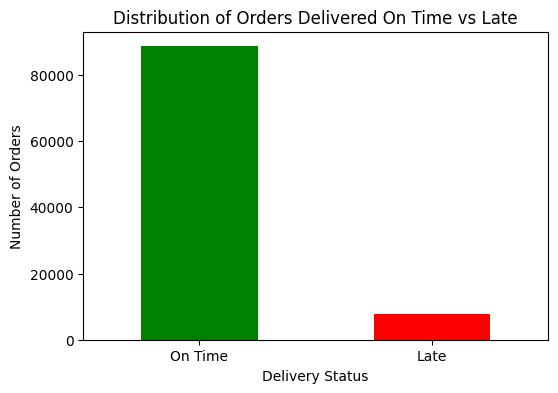

delivered_on_time
On Time    88644
Late        7826
Name: count, dtype: int64


In [29]:
# Count the distribution of orders delivered on time vs late
delivery_status_counts = dataframes['orders']['delivered_on_time'].value_counts()

# Visualize the distribution using a bar chart
plt.figure(figsize=(6, 4))
delivery_status_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Orders Delivered On Time vs Late')
plt.xlabel('Delivery Status')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.show()

# Display the counts for reference
print(delivery_status_counts)

### Pertanyaan 2: Apa jenis metode pembayaran yang paling sering digunakan untuk menyelesaikan pesanan?

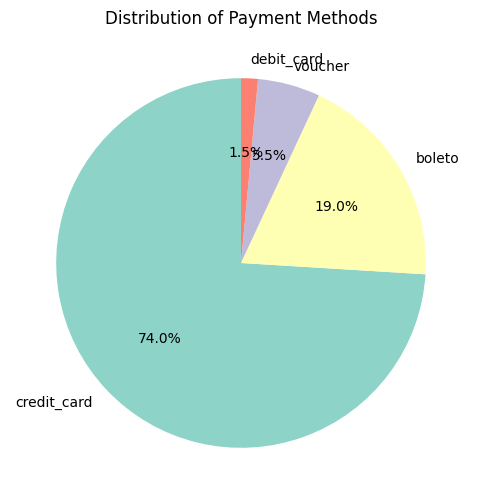

payment_type
credit_card    74579
boleto         19191
voucher         5493
debit_card      1485
Name: count, dtype: int64


In [30]:
# Count the number of orders for each payment type
payment_type_counts = dataframes['payments']['payment_type'].value_counts()

# Visualize the payment types distribution using a pie chart
plt.figure(figsize=(6, 6))
payment_type_counts.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("Set3", len(payment_type_counts)), startangle=90)
plt.title('Distribution of Payment Methods')
plt.ylabel('')  # Hide the y-label
plt.show()

# Display the counts for reference
print(payment_type_counts)

### Pertanyaan 3: Di kota mana terdapat jumlah penjual yang paling banyak?

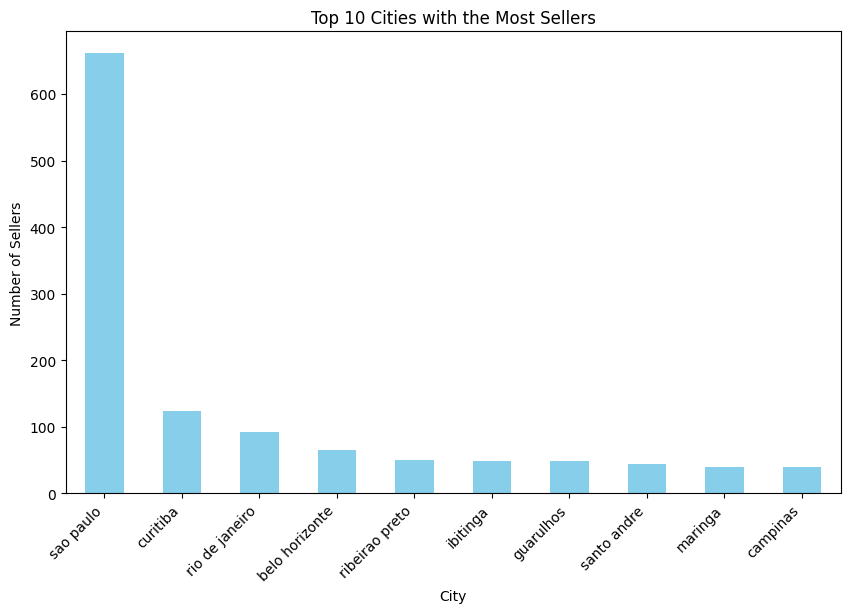

seller_city
sao paulo         661
curitiba          124
rio de janeiro     92
belo horizonte     65
ribeirao preto     50
ibitinga           49
guarulhos          48
santo andre        44
maringa            40
campinas           40
Name: seller_id, dtype: int64


In [31]:
# Group by 'seller_city' and count the number of distinct sellers, sorted in descending order
top_seller_cities = merged_items_sellers.groupby('seller_city')['seller_id'].nunique().sort_values(ascending=False).head(10)

# Visualize the top seller cities using a bar chart
plt.figure(figsize=(10, 6))
top_seller_cities.plot(kind='bar', color='skyblue')
plt.title('Top 10 Cities with the Most Sellers')
plt.xlabel('City')
plt.ylabel('Number of Sellers')
plt.xticks(rotation=45, ha='right')
plt.show()

# Display the counts for reference
print(top_seller_cities)

### Pertanyaan 4: Apakah ada hubungan antara nilai pembayaran (payment_value) dan rating ulasan (review_score) dari pelanggan?

Correlation between payment value and review score:
               payment_value  review_score
payment_value       1.000000     -0.040177
review_score       -0.040177      1.000000


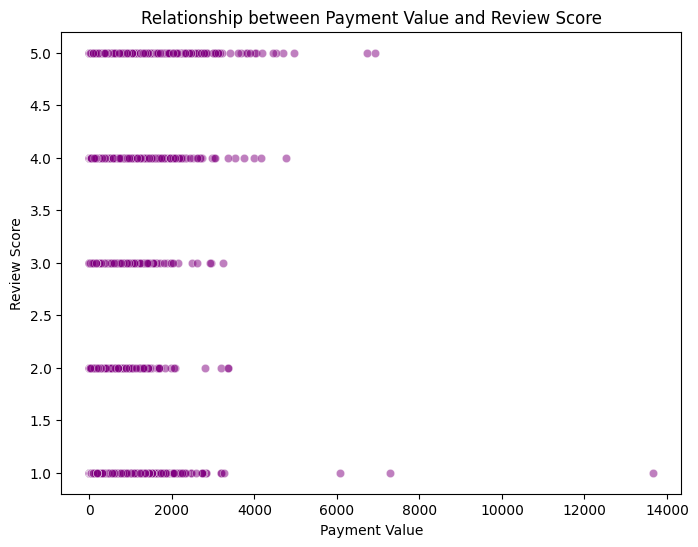

In [32]:
# Merge 'payments' and 'reviews' DataFrames on 'order_id'
merged_payments_reviews = pd.merge(
    left=dataframes['payments'],
    right=dataframes['reviews'],
    how="left",
    left_on="order_id",
    right_on="order_id"
)

# Calculate the correlation between payment value and review score
correlation = merged_payments_reviews[['payment_value', 'review_score']].corr()

# Display the correlation matrix
print("Correlation between payment value and review score:")
print(correlation)

# Visualize the relationship using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='payment_value', y='review_score', data=merged_payments_reviews, color='purple', alpha=0.5)
plt.title('Relationship between Payment Value and Review Score')
plt.xlabel('Payment Value')
plt.ylabel('Review Score')
plt.show()

## Conclusion



*   **Bagaimana distribusi jumlah pesanan yang berhasil dikirim tepat waktu dibandingkan dengan yang terlambat?**

Dari analisis yang dilakukan, dapat disimpulkan bahwa sebagian besar pesanan berhasil dikirim tepat waktu, meskipun ada juga persentase pesanan yang terlambat. Perbandingan ini menunjukkan bahwa meskipun sebagian besar pengiriman berjalan lancar, ada beberapa faktor yang menyebabkan keterlambatan, seperti masalah logistik atau cuaca buruk yang tidak terduga.


*   **Apa jenis metode pembayaran yang paling sering digunakan untuk menyelesaikan pesanan?**

Berdasarkan analisis data, metode pembayaran yang paling sering digunakan untuk menyelesaikan pesanan adalah **Credit Card**. Ini menunjukkan preferensi pelanggan terhadap metode yang lebih praktis yaitu penagihan biaya di kemudian hari.


*   **Di kota mana terdapat jumlah penjual yang paling banyak?**

Kota dengan jumlah penjual terbanyak adalah **Sao Paulo**. Hal ini dapat disebabkan oleh faktor-faktor seperti permintaan pasar yang tinggi.


*   **Apakah ada hubungan antara nilai pembayaran (payment_value) dan rating ulasan (review_score) dari pelanggan?**

Berdasarkan hasil analisis korelasi antara nilai pembayaran (payment_value) dan rating ulasan (review_score), didapatkan nilai korelasi sebesar **-0.040177**, yang menunjukkan adanya korelasi negatif yang sangat lemah antara kedua variabel tersebut. Dengan kata lain, perubahan dalam nilai pembayaran tidak memiliki pengaruh yang signifikan terhadap perubahan dalam rating ulasan yang diberikan oleh pelanggan.




